In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [77]:
#Read Dataset
df = pd.read_csv('height-weight (2).csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [78]:
#check null value
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [79]:
#checkduplicate value
df.duplicated().sum()

1

In [80]:
#statical analysis
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


<AxesSubplot: xlabel='Weight', ylabel='Height'>

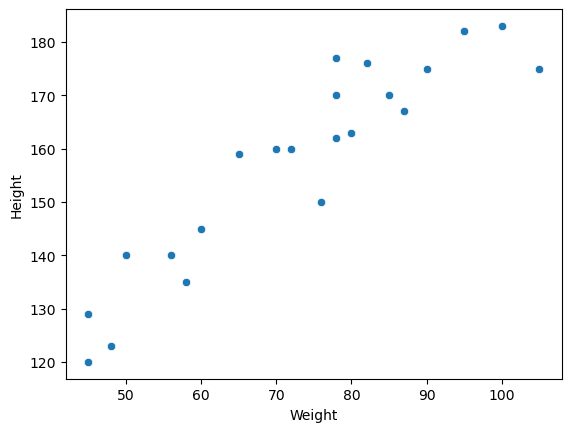

In [81]:
#Data visualization
sns.scatterplot(x = df['Weight'],y=df['Height'])

In [82]:
#difference between dependent and independent variable
x = df[['Weight']] # independent variable
y = df['Height'] #dependent variable

In [83]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [84]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [85]:
#Train_test_split the deta 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=0)

In [86]:
#check shape of x dataset
x_train.shape,x_test.shape

((20, 1), (3, 1))

In [87]:
#check shape of y dataset
y_train.shape,y_test.shape

((20,), (3,))

In [88]:
#scale the train data set
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [89]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [90]:
#Apply Simple Linear Regression algo
from sklearn.linear_model import LinearRegression
regrassor = LinearRegression()

In [91]:
regrassor.fit(x_train,y_train) #train the model

LinearRegression()

In [92]:
#check intercept
regrassor.intercept_

157.25

In [93]:
#check cofficient
regrassor.coef_

array([17.50697849])

In [94]:
# predict the test data
y_pred = regrassor.predict(x_test)

In [95]:
y_pred

array([178.89806472, 165.95899156, 140.08084522])

In [96]:
y_test

11    182
10    176
21    140
Name: Height, dtype: int64

In [97]:
#check the error
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse,mae,rmse)

36.81679632543353 4.407929645940224 6.067684593437066


In [98]:
#check the performance of this model
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [99]:
score

0.8929744292865305

In [100]:
adjusted_R_squred = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [101]:
adjusted_R_squred

0.785948858573061

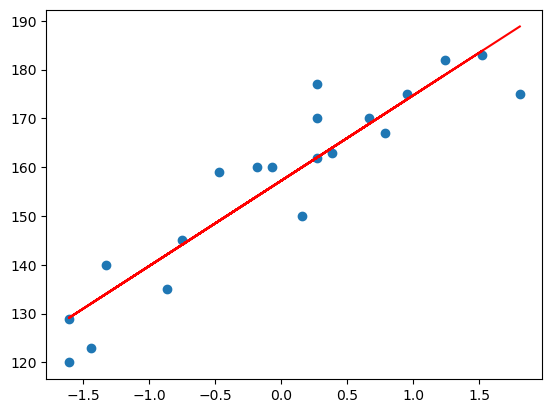

In [103]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regrassor.predict(x_train),'r')